### EXPLORATORY ANALYSIS

ROLES TO EXPLORE:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv(r'C:\Users\Territorio DSC\Desktop\Python codes\Python practices - Data science\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Limpiar columna de skills
def parse_job_skills(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    return skills

# Aplicar la función a la columna
df['job_skills'] = df['job_skills'].apply(parse_job_skills)

#### Filter for USA Data Analyst roles

In [2]:
empleo, pais = 'Data Analyst', 'United States'
df_DA_USA = df[(df['job_title_short'] == empleo) & (df['job_country'] == pais)].copy()

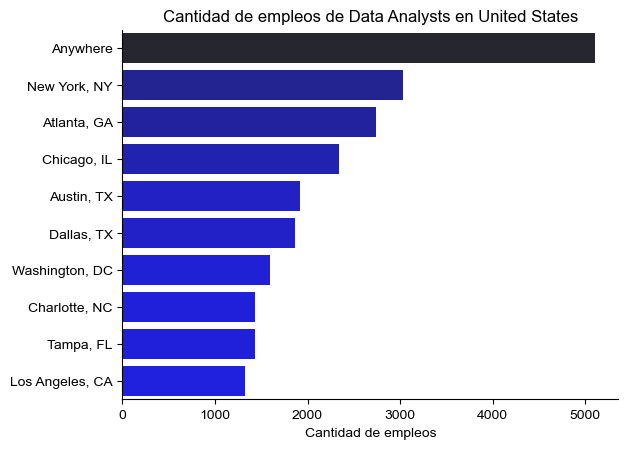

In [3]:
df_plot_location = df_DA_USA.value_counts(subset = 'job_location').head(10).to_frame()

sns.barplot(data = df_plot_location,
            x = 'count',
            y = 'job_location',
            hue = 'count',
            palette = 'dark:b_r',
            legend = False)

sns.set_theme(style = 'ticks')
sns.despine() # Remover linea superior y linea de la derecha del grafico

plt.title(f'Cantidad de empleos de {empleo}s en {pais}')
plt.ylabel('')
plt.xlabel('Cantidad de empleos')
plt.show()

#### Explorar datos booleanos

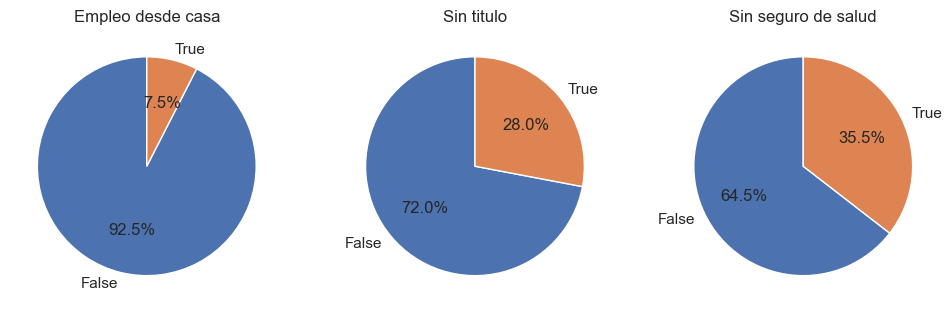

In [4]:
dict_column = {
    'job_work_from_home' : 'Empleo desde casa',
    'job_no_degree_mention' : 'Sin titulo',
    'job_health_insurance' : 'Sin seguro de salud'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_USA.value_counts(subset = column),
              labels = ['False', 'True'],
              autopct = '%1.1f%%',
              startangle = 90)
    ax[i].set_title(title)
plt.show()

#### Explorando las compañias que ofrecen empleo

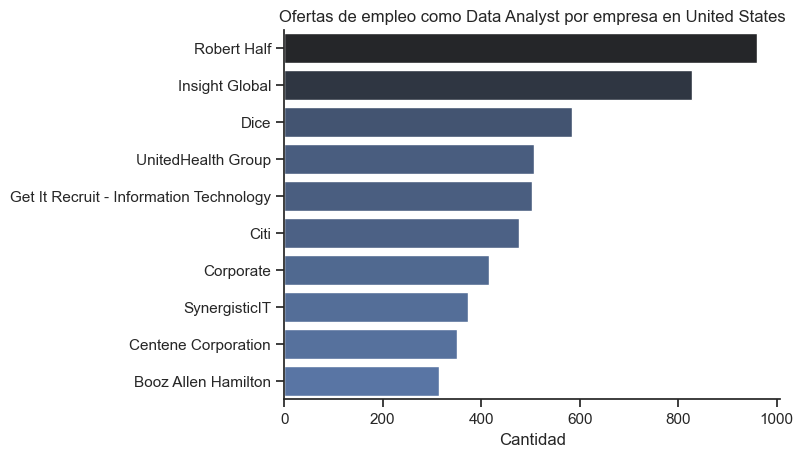

In [11]:
df_plot_companias = df_DA_USA.value_counts(subset = 'company_name').head(10).to_frame()

sns.barplot(data = df_plot_companias,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette = 'dark:b_r',
            legend = False)

sns.set_style('ticks')
sns.despine()

plt.title(f'Ofertas de empleo como {empleo} por empresa en {pais}')
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()